In [1]:
from sklearn.datasets import load_wine

wine_data = load_wine() 

In [15]:
import pandas as pd

hatyai = "Clean_Data/Clean_data44t_Hatyai.csv"
df = pd.read_csv(hatyai)
df = df.set_index('DATETIMEDATA')

droped_column = ['Unnamed: 0.1','Unnamed: 0']
df = df.drop(columns=droped_column)
df

,PM25,WS,TEMP,RH,WD
DATETIMEDATA,,,,,
2024-01-01 00:00:00,16.5,1,27,79,115
2024-01-01 01:00:00,33.6,1,27,82,97
2024-01-01 02:00:00,34.2,1,26,84,96
2024-01-01 03:00:00,20.1,1,26,82,108
2024-01-01 04:00:00,16.5,1,27,79,106
...,...,...,...,...,...
2024-03-07 19:00:00,16.4,1,30,64,109
2024-03-07 20:00:00,23.3,1,30,67,106
2024-03-07 21:00:00,20.2,1,29,69,104


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1608 entries, 2024-01-01 00:00:00 to 2024-03-07 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    1608 non-null   float64
 1   WS      1608 non-null   int64  
 2   TEMP    1608 non-null   int64  
 3   RH      1608 non-null   int64  
 4   WD      1608 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 75.4+ KB


In [17]:
df.describe()

,PM25,WS,TEMP,RH,WD
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,18.046642,0.899254,27.011816,65.381219,128.976368
std,5.247709,0.463798,7.148647,19.968041,46.639097
min,5.300000,0.000000,0.000000,0.000000,0.000000
25%,14.375000,1.000000,27.000000,57.000000,107.000000
50%,17.650000,1.000000,28.000000,71.000000,121.000000
75%,21.000000,1.000000,30.000000,78.000000,156.000000
max,43.400000,3.000000,36.000000,97.000000,253.000000


In [30]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [32]:
from pycaret.regression import *
s = setup(df, target = 'PM25', session_id = 123)

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(1608, 7)"
4,Transformed data shape,"(1608, 7)"
5,Transformed train set shape,"(1125, 7)"
6,Transformed test set shape,"(483, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [34]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.9699,14.9408,3.8543,0.4348,0.2030,0.1758,0.0710
et,Extra Trees Regressor,2.9769,15.1790,3.8850,0.4272,0.2045,0.1761,0.0370
gbr,Gradient Boosting Regressor,3.1484,16.4748,4.0430,0.3828,0.2133,0.1882,0.0320
knn,K Neighbors Regressor,3.1051,16.2731,4.0249,0.3817,0.2130,0.1833,0.0230
lightgbm,Light Gradient Boosting Machine,3.1791,16.9390,4.0981,0.3645,0.2139,0.1869,0.2330
dt,Decision Tree Regressor,3.5831,22.1369,4.6934,0.1599,0.2482,0.2090,0.0080
ada,AdaBoost Regressor,3.8154,22.6872,4.7414,0.1589,0.2598,0.2437,0.0140
llar,Lasso Least Angle Regression,3.9429,25.3971,4.9997,0.0728,0.2674,0.2434,0.0280
lasso,Lasso Regression,3.9542,25.3746,4.9990,0.0725,0.2678,0.2444,0.0110
lr,Linear Regression,3.9622,25.3468,4.9973,0.0725,0.2676,0.2448,0.3160


In [35]:
print(best)

RandomForestRegressor(n_jobs=-1, random_state=123)


In [36]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

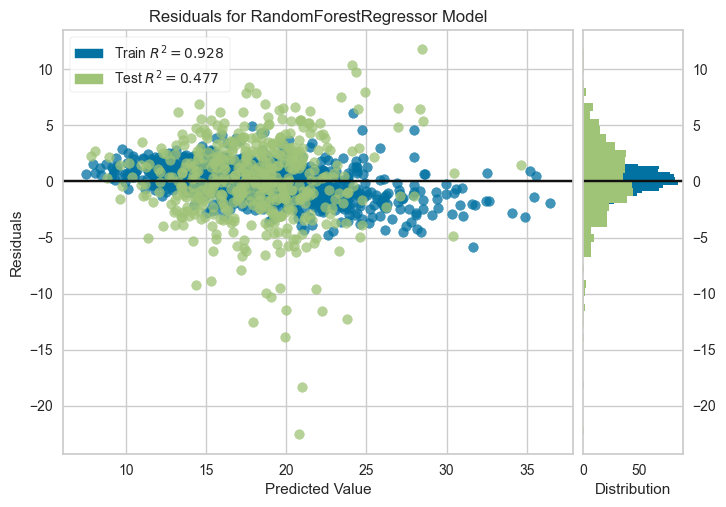

In [37]:

plot_model(best, plot = 'residuals')

In [39]:
ets = s.create_model('rf')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:21:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6193,11.4514,3.3840,0.4852,0.1945,0.1710
1,3.0145,14.5775,3.8180,0.3959,0.2035,0.1762
2,2.9033,14.9477,3.8662,0.3548,0.2014,0.1723
3,2.9410,15.7598,3.9699,0.2496,0.2108,0.1807
4,3.2244,17.5841,4.1933,0.4442,0.2156,0.1789
5,3.2922,18.7642,4.3318,0.5034,0.2092,0.1806
6,2.7623,12.1996,3.4928,0.5242,0.1930,0.1662
7,2.9505,13.7580,3.7092,0.5430,0.1971,0.1765
8,2.8528,13.2866,3.6451,0.2789,0.1875,0.1621


In [41]:
tuned_ets = s.tune_model(ets)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9065,13.9079,3.7293,0.3748,0.2131,0.1913
1,3.1418,16.1447,4.0180,0.3310,0.2119,0.1829
2,2.8112,14.4731,3.8044,0.3753,0.2028,0.1724
3,3.1312,16.5480,4.0679,0.2121,0.2195,0.1922
4,3.4694,19.4345,4.4085,0.3857,0.2251,0.1951
5,3.3122,19.4918,4.4149,0.4841,0.2155,0.1825
6,2.8936,13.1042,3.6200,0.4889,0.1971,0.1750
7,3.0333,15.4811,3.9346,0.4857,0.2037,0.1807
8,2.9037,15.5459,3.9428,0.1563,0.1990,0.1651


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [42]:
holdout_pred = s.predict_model(tuned_ets, verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2.7729,14.1858,3.7664,0.4770,0.1917,0.1645


In [43]:
holdout_pred

,Unnamed: 0.1,Unnamed: 0,WS,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,,,
2024-02-28 11:00:00,1403,1403,1,33,50,204,16.100000,14.306
2024-02-28 15:00:00,1407,1407,1,33,52,198,16.299999,13.593
2024-02-13 20:00:00,1052,1052,1,28,70,131,19.200001,20.945
2024-01-17 22:00:00,406,406,1,28,70,183,16.600000,15.134
2024-03-02 18:00:00,1482,1482,1,29,69,155,21.100000,20.383
...,...,...,...,...,...,...,...,...
2024-02-14 06:00:00,1062,1062,1,26,82,132,15.200000,17.481
2024-02-22 03:00:00,1251,1251,0,26,83,114,13.400000,17.358
2024-01-04 13:00:00,85,85,1,33,48,135,15.400000,18.881


In [44]:
final_model = s.finalize_model(tuned_ets)

In [48]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming your data is stored in a DataFrame called df_train
endog = df['PM25']  # Endogenous variable (target variable)
exog = df[['WS', 'TEMP', 'RH', 'WD']]  # Exogenous variables

# Define and train the SARIMAX model
model = SARIMAX(endog, exog=exog, order=(1, 0, 1), seasonal_order=(1, 1, 1, 24))
result = model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71542D+00    |proj g|=  3.34221D-01


 This problem is unconstrained.



At iterate    5    f=  2.66472D+00    |proj g|=  9.98110D-02

At iterate   10    f=  2.63950D+00    |proj g|=  2.51494D-02

At iterate   15    f=  2.62643D+00    |proj g|=  1.46275D-02

At iterate   20    f=  2.62463D+00    |proj g|=  5.08439D-03

At iterate   25    f=  2.62391D+00    |proj g|=  1.28909D-02

At iterate   30    f=  2.62380D+00    |proj g|=  1.48432D-03

At iterate   35    f=  2.62377D+00    |proj g|=  3.13842D-03

At iterate   40    f=  2.62366D+00    |proj g|=  4.02360D-03

At iterate   45    f=  2.62355D+00    |proj g|=  2.84418D-03

At iterate   50    f=  2.62346D+00    |proj g|=  2.21539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [50]:
# Forecasting
forecast_horizon = 48  # Forecast horizon of 24 hours
forecast = result.forecast(steps=forecast_horizon, exog=exog.iloc[-forecast_horizon:])

# Extract the last datetime value from the train.csv DataFrame
last_datetime = df.index[-1]

# Create a new datetime index for the forecast DataFrame
forecast_index = pd.date_range(start=last_datetime, periods=forecast_horizon + 1, freq='H')[1:]

# Create a DataFrame with forecasted values and the new datetime index
forecast_df = pd.DataFrame({'DATETIMEDATA': forecast_index, 'PM25': forecast})

forecast_df

,DATETIMEDATA,PM25
2024-03-08 00:00:00,2024-03-08 00:00:00,22.691434
2024-03-08 01:00:00,2024-03-08 01:00:00,21.855907
2024-03-08 02:00:00,2024-03-08 02:00:00,20.341851
2024-03-08 03:00:00,2024-03-08 03:00:00,21.594619
2024-03-08 04:00:00,2024-03-08 04:00:00,20.320903
2024-03-08 05:00:00,2024-03-08 05:00:00,20.521773
2024-03-08 06:00:00,2024-03-08 06:00:00,20.297053
2024-03-08 07:00:00,2024-03-08 07:00:00,24.843132
2024-03-08 08:00:00,2024-03-08 08:00:00,25.704018
2024-03-08 09:00:00,2024-03-08 09:00:00,23.431685


In [ ]:
# Import the necessary libraries
import pandas as pd

# Set the forecast horizon
forecast_horizon = 48  # Forecast horizon of 48 hours

# Assuming you have the 'result' and 'exog' dataframes defined

# Perform the forecast
forecast = result.forecast(steps=forecast_horizon, exog=exog.iloc[-forecast_horizon:])

# Extract the last datetime value from the train.csv DataFrame
last_datetime = df.index[-1]

# Define the date you want to start the forecast from
start_date = '2024-03-20'  # Example: 'YYYY-MM-DD'

# Create a new datetime index for the forecast DataFrame
forecast_index = pd.date_range(start=start_date, periods=forecast_horizon, freq='H')

# Create a DataFrame with forecasted values and the new datetime index
forecast_df = pd.DataFrame({'DATETIMEDATA': forecast_index, 'PM25': forecast})

# Display the forecast DataFrame
print(forecast_df)
